    # Strand to Strand Distance and Tilt vs Radius

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import time
from collections import Counter
plt.style.use('seaborn-notebook')
plt.style.use('seaborn-whitegrid')

### Functions

In [2]:
def get_file_length(input_file):
    with open(input_file) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

### Read-in from .pdb

In [3]:
filename='7kwz_5layers.pdb'
datadir='/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/error_testing/7kwz/'
input_file = open(f'{datadir}{filename}','r')
file_length = get_file_length(f'{datadir}{filename}')

atom = []
atomno = []
nama = []
resn = []
chainid = []
resida = []
xa = []
ya = []
za = []
occup = []
tempf = []
elem = []
charge = []
for lines in range(file_length):
    line = input_file.readline()
    #line = str(line)
    if line[0:4] == 'ATOM':
        atom.append(line[0:6])
        atomno.append(line[6:11])
        nama.append(line[12:17])
        resn.append(line[17:20])
        chainid.append(line[21:22])
        resida.append(int(line[22:26]))
        xa.append(float(line[30:38]))
        ya.append(float(line[38:46]))
        za.append(float(line[46:54]))
        occup.append(line[54:60])
        tempf.append(line[60:66])
        elem.append(line[76:78])
        charge.append(line[78:80])
d = {'Atom': atom, 'Atom Number': atomno, 'Atom Name': nama, 'Residue Name': resn, 'Chain ID': chainid, 'Residue Number': resida, 'X': xa, 'Y': ya, 'Z': za, 'Occupancy': occup, 'Temperature Factor': tempf, 'Element': elem, 'Charge': charge} 
df = pd.DataFrame(d)
input_file.close()
df

,Atom,Atom Number,Atom Name,Residue Name,Chain ID,Residue Number,X,Y,Z,Occupancy,Temperature Factor,Element,Charge
0,ATOM,1,N,PHE,A,276,42.492,-3.375,-18.760,1.00,123.29,N,\n
1,ATOM,2,CA,PHE,A,276,41.162,-3.197,-19.333,1.00,123.29,C,\n
2,ATOM,3,C,PHE,A,276,40.100,-2.989,-18.253,1.00,123.29,C,\n
3,ATOM,4,O,PHE,A,276,39.083,-3.677,-18.223,1.00,123.29,O,\n
4,ATOM,5,CB,PHE,A,276,40.798,-4.393,-20.224,1.00,123.29,C,\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,ATOM,4691,O,MET,E,414,25.728,-19.402,6.484,1.00,129.21,O,\n
4691,ATOM,4692,CB,MET,E,414,27.661,-21.120,8.436,1.00,129.21,C,\n
4692,ATOM,4693,CG,MET,E,414,29.078,-21.640,8.619,1.00,129.21,C,\n
4693,ATOM,4694,SD,MET,E,414,30.099,-21.637,7.138,1.00,129.21,S,\n


### Calculations (Radius, Interstrand Distance)

In [4]:
#Get a list of the Chain IDs
temp = ['poop']
all_chain_IDs = [] 
num_chains = 0
num_atm_chn = 0
for i in df['Chain ID']:
    if temp != i:
        all_chain_IDs.append(i)
        temp = i
        num_chains += 1
        num_atm_chn = 0
    if temp == i:
        num_atm_chn += 1

In [5]:
#Calculate centers of mass for each chain
#chainid, xa, ya, za = np.array(df['Chain ID']), np.array(df['X']), np.array(df['Y']), np.array(df['Z'])
length = len(chainid)
comx, comy, comz = [], [], []
for i in range(num_chains):
    sumx=0
    sumy=0
    sumz=0
    for j in range(length):
        if chainid[j] == all_chain_IDs[i]:
            sumx += (xa[j])
            sumy += (ya[j])
            sumz += (za[j])
    comx.append(sumx/num_atm_chn)
    comy.append(sumy/num_atm_chn)
    comz.append(sumz/num_atm_chn)

In [6]:
#Calculate all interstrand distances
#resida, nama, resn = np.array(df['Residue Number']), np.array(df['Atom Name']), np.array(df['Residue Name'])
dist = []
radius = []
chain_ID_1 = []
chain_ID_2 = []
residue_number_12 = []
residue_name_12 = []
atom_name_12 = []
#start = time.time()
for i in range(num_chains):
    for j in range(i+1,num_chains):
        diffcomx=comx[i]-comx[j]
        diffcomy=comy[i]-comy[j]
        diffcomz=comz[i]-comz[j]
        diffcom=np.sqrt(diffcomx**2+diffcomy**2+diffcomz**2)
        if diffcom>0 and diffcom<5.2:
            print(all_chain_IDs[i],all_chain_IDs[j])
            for k in range(length):
                for l in range(length):
                    if resida[k]==resida[l] and nama[k]==nama[l] and resn[k]==resn[l] and chainid[k]==all_chain_IDs[i] and chainid[l]==all_chain_IDs[j]:
                        xak, xal, yak, yal, zak, zal = xa[k], xa[l], ya[k], ya[l], za[k], za[l]
                        disttemp = np.sqrt((xak-xal)**2+(yak-yal)**2+(zak-zal)**2)
                        dist.append(disttemp)
                        radius.append(np.sqrt(((xak**2+((yak)**2)))))
                        chain_ID_1.append(chainid[k])
                        chain_ID_2.append(chainid[l])
                        residue_number_12.append(resida[k])
                        atom_name_12.append(nama[k])
                        residue_name_12.append(resn[k])
#elapsed_time_fl = (time.time() - start)
#print(elapsed_time_fl)

A B
B C
C D
D E


In [7]:
#Calculate X, Y distance for carbonyl oxygens
CO_xy=[]
CO_radius=[]
CO_chainid=[]
CO_residue_number=[]
CO_residue_name=[]
for i in range(length):
    if nama[i]==' C   ':
        #print(nama[i])
        #print(nama[i+1])
        CO_xy.append(np.sqrt((xa[i+1]-xa[i])**2+(ya[i+1]-ya[i])**2))
        CO_radius.append(np.sqrt(xa[i]**2+ya[i]**2))
        CO_chainid.append(chainid[i])
        CO_residue_number.append(resida[i])
        CO_residue_name.append(resn[i])
        #print(CO_xy)
    if nama[i]==' C  A':
        #print(nama[i])
        #print(nama[i+2])
        CO_xy.append(np.sqrt((xa[i+2]-xa[i])**2+(ya[i+1]-ya[i])**2))
        CO_radius.append(np.sqrt(xa[i]**2+ya[i]**2))
        CO_chainid.append(chainid[i])
        CO_residue_number.append(resida[i])
        CO_residue_name.append(resn[i])
        #print(CO_xy)
    if nama[i]==' C  B':
        #print(nama[i])
        #print(nama[i+2])
        CO_xy.append(np.sqrt((xa[i+2]-xa[i])**2+(ya[i+2]-ya[i])**2))
        CO_radius.append(np.sqrt(xa[i]**2+ya[i]**2))
        CO_chainid.append(chainid[i])
        CO_residue_number.append(resida[i])
        CO_residue_name.append(resn[i])
        #print(CO_xy)
        
for i in range(len(CO_radius)):
    print(CO_xy[i],CO_radius[i],CO_chainid[i],CO_residue_number[i],CO_residue_name[i])

1.2278570763733077 40.21124371366795 A 276 PHE
0.7072828288598565 38.58965895158961 A 277 GLY
0.6337018226263833 38.2608054802823 A 278 GLY
1.183348638398675 37.220217261590506 A 279 ASN
0.675443557967649 34.96266640289324 A 280 PRO
0.44246242778341976 36.40071522648971 A 281 GLY
0.35373436361202143 37.291638741144105 A 282 GLY
0.48101247385072776 36.831396443795064 A 283 PHE
0.47144458847249315 37.08742269287527 A 284 GLY
0.8230492087354198 37.65109545551098 A 285 ASN
0.7866365107214375 38.58964090270859 A 286 GLN
1.017386848745354 36.12544008036442 A 287 GLY
0.598319312741953 33.18533249795759 A 288 GLY
0.170510996712821 29.86835865929027 A 289 PHE
0.8493014776862222 28.098205565480512 A 290 GLY
0.9199141264270274 29.51634416725757 A 291 ASN
0.6792385442537845 29.232434127181403 A 292 SER
0.7453596447353484 31.61340380281756 A 293 ARG
0.301091348264941 32.351044805384575 A 294 GLY
0.8739799768873413 35.28481160499514 A 295 GLY
0.7384233203251349 36.76041268810784 A 296 GLY
1.11292093

0.8721949323402408 17.168386208377306 C 402 GLY
0.8565891664035926 17.795870307461783 C 403 SER
0.2438237068047328 19.470022521815427 C 404 SER
0.2621316463153566 20.784457269796583 C 405 MET
0.4680683710741413 22.71995319097291 C 406 ASP
0.5050148512667735 23.617669000136317 C 407 SER
0.3794864951483802 25.492171366911844 C 408 LYS
0.2998833106393213 26.546788977200237 C 409 SER
0.37945882517079377 28.978527671363846 C 410 SER
0.72560319734687 31.113771629296245 C 411 GLY
1.2331236758735942 33.843319724873325 C 412 TRP
0.7057428710231529 33.2557118702938 C 413 GLY
0.4295160066865962 32.49543087881741 C 414 MET
1.227899833048283 40.211135298571214 D 276 PHE
0.7076510439475124 38.58965152732012 D 277 GLY
0.6333727180736466 38.26117631490177 D 278 GLY
1.1833384976413135 37.22042204220688 D 279 ASN
0.6754628043053131 34.96235536974018 D 280 PRO
0.44283292560513166 36.40055863582316 D 281 GLY
0.3541073283624636 37.291185727997444 D 282 GLY
0.4814156208516728 36.83157804113204 D 283 PHE
0.4

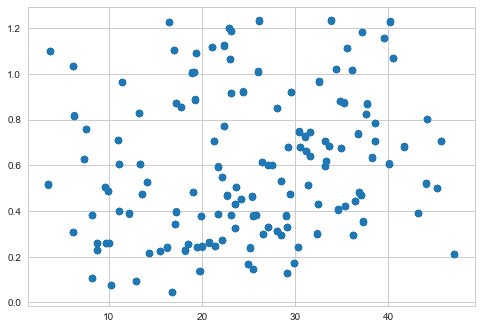

In [8]:
#graph CO_xy versus radius
plt.figure(1)
plt.scatter(CO_radius,CO_xy)

In [9]:
#Calculate average interstrand distances
distavg=[]
radiusavg=[]
for i in range(num_atm_chn):
    matches=1
    distsum=dist[i]
    radiussum=radius[i]
    for j in range(num_atm_chn+1,len(dist)):
        if residue_name_12[i]==residue_name_12[j] and atom_name_12[i]==atom_name_12[j] and residue_number_12[i]==residue_number_12[j]:
            matches=matches+1
            distsum=dist[j]+distsum
            radiussum=radius[j]+radiussum
    distavg.append(distsum/matches)
    radiusavg.append(radiussum/matches)    
    

In [10]:
#Calculate average CO tilt
CO_xy_avg=[]
CO_radius_avg=[]
countA=0
countB=0
for i in range(CO_chainid.count('A')):
    matches=1
    CO_xy_sum=CO_xy[i]
    CO_radius_sum=CO_radius[i]
    for j in range(CO_chainid.count('A')+1,len(CO_xy)):
        if CO_residue_name[i]==CO_residue_name[j] and CO_residue_number[i]==CO_residue_number[j]:
            matches=matches+1
            CO_xy_sum=CO_xy[j]+CO_xy_sum
            CO_radius_sum=CO_radius[j]+CO_radius_sum
    CO_xy_avg.append(CO_xy_sum/matches)
    CO_radius_avg.append(CO_radius_sum/matches)

for i in range(len(CO_xy_avg)):
    print(CO_xy_avg[i],CO_radius_avg[i])

1.2279217320094142 40.211221132107305
0.7074299723051635 38.58977142429761
0.6338320779901022 38.260850363699525
1.183425444698966 37.2202331983439
0.6754844840570435 34.962647853811
0.4425210465065459 36.40061540622994
0.35383339091076643 37.29154876864031
0.4810283043193362 36.83151596375396
0.4717074943447176 37.0876488975015
0.8230414973929703 37.65125285241696
0.7866586115025976 38.58956016806691
1.017327722991166 36.125400361617
0.5982316839507443 33.1855017858939
0.17067930938831583 29.86835677011167
0.8495518241752837 28.098352531284853
0.9196596421364447 29.5162718801675
0.6792249727199847 29.232299285336143
0.7454403503119371 31.613341442924195
0.30119326152138726 32.35108598368143
0.8738967148445512 35.28466957732573
0.7384378749958443 36.76037961716157
1.1127056935065247 35.57207581778566
0.966357885584355 32.565706639880425
0.6413836317931673 31.63949536872956
0.6842685675664466 33.62912005626304
0.5125256737244992 31.34955097805143
0.3294716006421611 29.13611270456306
0.6

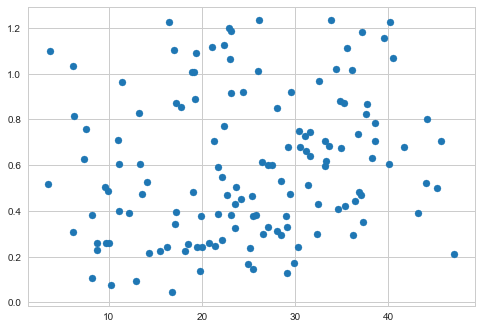

In [11]:
#graph CO_xy versus radius
plt.figure(1)
plt.scatter(CO_radius_avg,CO_xy_avg)

In [12]:
#Save radius, interstrand distance
with open(f'{filename}'[0:-4] + str("_rad_dist.csv"),'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    for i in range(len(distavg)):
        row = [radius[i],distavg[i],chain_ID_1[i],chain_ID_2[i],atom_name_12[i],residue_name_12[i],residue_number_12[i],filename[0:4]]
        csv_writer.writerow(row)

In [13]:
#Save radius, tilt
with open(f'{filename}'[0:-4] + str("_rad_tilt.csv"),'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    for i in range(len(CO_xy_avg)):
        row = [CO_radius_avg[i],CO_xy_avg[i],CO_chainid[i],CO_residue_name[i],CO_residue_number[i],filename[0:4]]
        csv_writer.writerow(row)

### Graph Interstrand Distance versus Radius

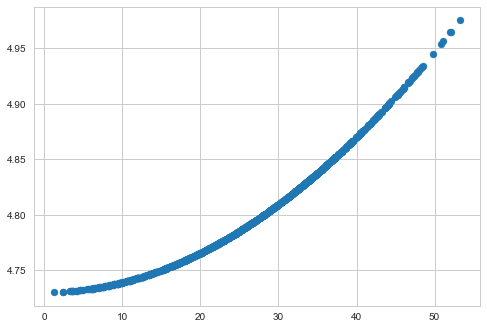

In [14]:
data=open(f'{filename}'[0:-4] + str("_rad_dist.csv"))

data = np.genfromtxt(f'{filename}'[0:-4] + str("_rad_dist.csv"), delimiter=",", names=["radius", "distance"])

plt.figure(1)
plt.scatter(data['radius'], data['distance'])